In [67]:
from __future__ import print_function, division

In [68]:
import numpy as np
import matplotlib.pyplot as plt

##### Christian H. Nunez | Physics 91SI: Week 3

# Part 1

In [69]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [70]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

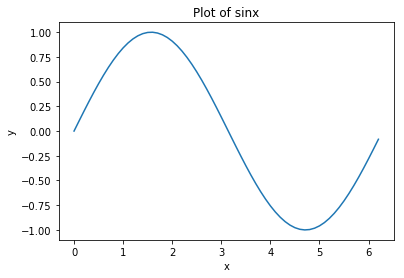

In [71]:
# Generating x values from 0 to 2pi with 0.1 step, graphing sinx over this range
xarr = np.arange(0,2*np.pi, 0.1) # 0.1 step
yarr = np.sin(xarr)
plot_fn(xarr, yarr, 'Plot of sinx')

our integration function, dx = 0.1: 
-0.0006994492302847821


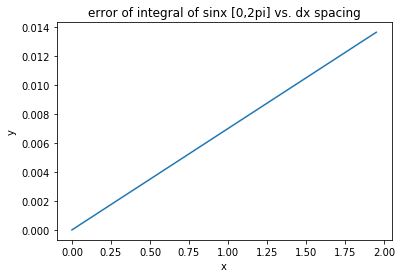

In [81]:
# integrating y
integrate(yarr, 0.1)
# plotting integral of sinx against the value of dx to see dependence
# on dx spacing.
dxarr = np.arange(0, 2, 0.05)
sinxarr = integrate(yarr, dxarr)
print("our integration function, dx = 0.1: ")
print(integrate(yarr,0.1))
plot_fn(dxarr, np.abs(sinxarr), "error of integral of sinx [0,2pi] vs. dx spacing")

We see above that the calculated integral of sinx depends linearly on the spacing. As our chosen dx increases, the integral calculated for sinx from 0 to 2pi increases in error.

In [129]:
# TODO now use a np function to integrate y and compare
sinxarr2 = np.trapz(np.sin(xarr), xarr)
print("np.trapz function, dx = 0.1:")
print(sinxarr2)

np.trapz function, dx = 0.1:
0.0034550209105898236


In [138]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
xarr6pi = np.arange(-0.03, 6*np.pi + 0.03, 0.01) # Generate x-values
yarr6pi = np.sin(xarr6pi) # Generate sin(x) values
signs = np.sign(yarr6pi) # Array of signs of the sin(x) values
diffs = np.diff(signs) # Array of the difference between subsequent values in signs

#Finding the zeros. The minima/maxima will be between these zeros.
zeroslist = [] # empty numpy array
for i in range(0, diffs.size):
    if diffs[i] == -2 or diffs[i] == 2: 
        zeroslist.append(xarr6pi[i]);

critpoints = []
for n in range(1, len(zeroslist)):
    critpoints.append((zeroslist[n] + zeroslist[n-1])/2)

# Print critical points of sinx
for criticalpoint in critpoints:
    print("Critical point: ", criticalpoint)

# These critical points correspond quite closely to the exact values.

Critical point:  1.5650000000000006
Critical point:  4.710000000000001
Critical point:  7.850000000000001
Critical point:  10.990000000000002
Critical point:  14.130000000000003
Critical point:  17.270000000000003


# Part 2

In [110]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [76]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [77]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.rfft(y_values)# perform Fourier transform
    
    low_pass_filter = np.ones(y_fft.shape) # build low pass filter for Fourier function
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    
    y_clean_values = np.fft.irfft(y_fft * low_pass_filter, len(x_values))

    return y_clean_values

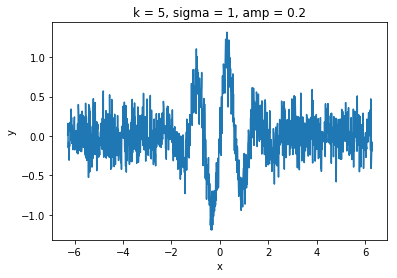

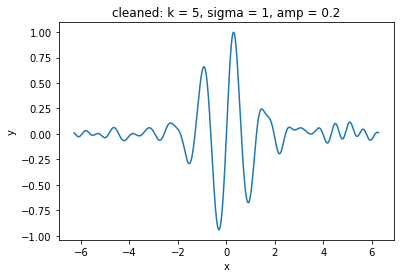

In [78]:
#call noisy_packet() to get a Gaussian wave packet,
xarr3 = np.arange(-2*np.pi,2*np.pi, 0.01)
ypacketarr = noisy_packet(xarr3,5,1,0.2)
plot_fn(xarr3,ypacketarr, "k = 5, sigma = 1, amp = 0.2")
# call clean_data() to apply a low pass filter to the data, and
cleanedy = clean_data(xarr3, ypacketarr)
# finally plot the result using plot_fn
plot_fn(xarr3, cleanedy, "cleaned: k = 5, sigma = 1, amp = 0.2")

# Part 3

In [79]:
# TODO mask the arrays, then plot

In [18]:
# TODO try to generate masked noisy data and then clean it